Chapter 3-- CLASSIFICATION


In [36]:
## TO FETCH MNIST DATASET##

In [37]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
     

In [38]:
X, y=mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
X.shape


(70000, 784)

In [40]:
y.shape

(70000,)

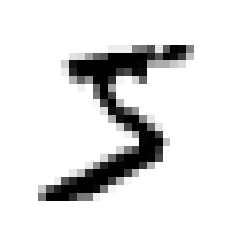

In [41]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [42]:
y[0]
     

'5'

In [43]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [44]:
## TRAINING A BINARY CLASSIFER ##

In [45]:
y_train_5 = (y_train =="5" ) #True for all the digit 5 and false for all other digits other than 5
y_test_5 = (y_test == "5")

In [46]:
## STOCHASTIC GRADIENT DESCENT (SGD) ##

In [47]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
     

SGDClassifier(random_state=42)

In [48]:
sgd_clf.predict([some_digit])

array([ True])

PERFOMANCE MEASURES

MEASURING ACCURACY USING CROSS VALIDATION

In [49]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

IMPLEMENTATION OF CROSS VALIDATION

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [52]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [53]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

confusion matrix

In [54]:
## a set of prediction is needed to compute the confusion matrix ##

In [55]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [56]:
## USING CONFUSION MATRIX ##

In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [58]:
## Each row in the matrix repersents the actual class and column repersents the predicted class ##
## 153892 TN ,687 FP ##
## 1891 FN , 3530 TP

In [59]:
## pretend to get a perfect classifier ##
y_train_perfect_predictions=y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)
## only have TP AND TN

array([[54579,     0],
       [    0,  5421]])

PRECISION AND RECALL

In [60]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)#==3530/(687+3530)
     

0.8370879772350012

In [61]:
recall_score(y_train_5,y_train_pred)#==3530/(1891+3530)

0.6511713705958311

In [62]:
## when precesion and recall combine together into a single matrix it is called f1 score
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [63]:
## Increase in precision reduces the recall and vice versa, it is called precision or recall trade off ##

In [64]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [65]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [66]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
     

array([False])

In [67]:
## in order to decide which threshold to choose, using cross validation it is necessary to get the scores of all the instancesn ##
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")
     

In [68]:
## now using all these scores we can compute prescision and recall for all the possible thresholds##
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

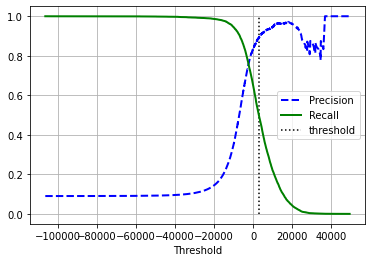

In [69]:
## using mathplotlib, we can plot the precision and recall##
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.xlabel('Threshold')
plt.grid()


plt.legend()
plt.show()


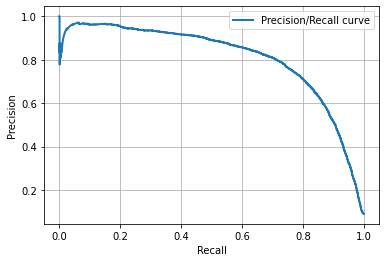

In [70]:
## a way to choose good precision / recall trade off is to plot precision directly aganist recall##
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
[...] # beautify the figure: add labels, grid, legend, arrow, and text
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()